In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score

In [2]:
from sentiment_explorerVersion7 import *

In [3]:
def pdColumn_to_list_converter(df):
    df_list = df.values.tolist() #produces list of lists
    proper_list = [item for sublist in df_list for item in sublist] #a single list
    return proper_list

In [4]:
df = pd.read_csv('newtwitterlabelled.csv')  #import reviews
df.head()

,Text,Sentiment Num,Polarities Found,Final
0,im at comfortdelgro engineering https//t co/wa...,0,"[0, 0, 0, 0, 0, 0]",0
1,you can now ebook a comfortdelgro cab on lazad...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0
2,when are we going to go offline if our server ...,-1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",-1
3,mmm268mmm バス乗り場行くのメンドウだからgrab comfortdelgro入れて...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0
4,you can now book a comfortdelgro cab on lazada...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0


### Removing Punctuations From Data

In [5]:
import re

def newtext(text):
    text = text.replace(":)","happy")
    text = text.replace(":(","sad")
    text = re.sub ('\s+', ' ', text)
    
    text = re.sub(r"""
               [,.;@#?!&$]+  # Accept one or more copies of punctuation
               \ *           # plus zero or more copies of a space,
               """,
               " ",          # and replace it with a single space
               text, flags=re.VERBOSE)
    text= re.sub(' +', ' ', text)
    #text= re.sub(':', '', text)
    text= re.sub("[:']", '', text)
    #text = re.sub ('\s+', '', text)
    return text.lower()



In [6]:
df["Text"] = df['Text'].apply(lambda text: newtext(text))

In [7]:
df.drop(df.columns[0], axis=1)

,Sentiment Num,Polarities Found,Final
0,0,"[0, 0, 0, 0, 0, 0]",0
1,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0
2,-1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",-1
3,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0
4,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0
5,-1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0,...",-1
6,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",1
7,-1,"[0, 0, 0, 0, 0, 0, 11, 0, 0, 0, -1, 0, 0, (-1,...",-1
8,1,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1
9,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0...",1


### Counting accuracy

In [8]:
acc_dict = {}

## Step 1: Using Prof Wang's Standard English Dictionary Only

In [9]:
df["Polarities Found"] = df['Text'].apply(lambda text: findPolarity(' '.join(text.split())))

In [10]:
df["Polarity Count"] = df['Polarities Found'].apply(lambda scores: countPolarity(scores))

In [11]:
acc_dict['Prof Wang Standard English Only'] = accuracy_score(df["Sentiment Num"], df["Polarity Count"])

In [12]:
acc_dict

{'Prof Wang Standard English Only': 0.7738461538461539}

In [13]:
df = df.drop(df.columns[-2:], axis=1)


## Step2 : Using Prof Wang's Standard el + Prof Wang Singlish Dict 

In [14]:
df["Polarities Found"] = df['Text'].apply(lambda text: findPolarity1(' '.join(text.split())))

In [15]:
df["Polarity Count"] = df['Polarities Found'].apply(lambda scores: countPolarity1(scores))

In [16]:
acc_dict['Prof Wang Standard English + Prof Wang Singlish'] = accuracy_score(df["Sentiment Num"], df["Polarity Count"])

In [17]:

acc_dict

{'Prof Wang Standard English Only': 0.7738461538461539,
 'Prof Wang Standard English + Prof Wang Singlish': 0.7784615384615384}

In [18]:
df = df.drop(df.columns[-2:], axis=1)

# Step 3: Combined Standard EL + Combined Singlish

In [19]:
df["Polarities Found"] = df['Text'].apply(lambda text: findPolarity2(' '.join(text.split())))

In [20]:
df["Polarity Count"] = df['Polarities Found'].apply(lambda scores: countPolarity2(scores))

In [21]:
acc_dict['Combined Standard English + Combined Singlish'] = accuracy_score(df["Sentiment Num"], df["Polarity Count"])

In [22]:
acc_dict

{'Prof Wang Standard English Only': 0.7738461538461539,
 'Prof Wang Standard English + Prof Wang Singlish': 0.7784615384615384,
 'Combined Standard English + Combined Singlish': 0.7753846153846153}

In [23]:
df = df.drop(df.columns[-2:], axis=1)

In [24]:
df

,Text,Sentiment Num
0,im at comfortdelgro engineering https//t co/wa...,0
1,you can now ebook a comfortdelgro cab on lazad...,0
2,when are we going to go offline if our server ...,-1
3,mmm268mmm バス乗り場行くのメンドウだからgrab comfortdelgro入れて...,0
4,you can now book a comfortdelgro cab on lazada...,0
5,bytebot tuansahib what are the options a perso...,-1
6,the ride-hailing service of singapore transpor...,0
7,"service operator comfortdelgro said ""we will n...",-1
8,comfortdelgro partners french energy firm engi...,1
9,do you know you can book wheelchair transport ...,1


# Step 4: Combined Standard EL + Combined Singlish + Transport Domain

In [25]:
df["Polarities Found"] = df['Text'].apply(lambda text: findPolarity3(' '.join(text.split())))

In [26]:
df["Polarity Count"] = df['Polarities Found'].apply(lambda scores: countPolarity3(scores))

In [27]:
acc_dict['Combined Standard English + Combined Singlish + Transport Domain'] = accuracy_score(df["Sentiment Num"], df["Polarity Count"])

In [28]:
acc_dict

{'Prof Wang Standard English Only': 0.7738461538461539,
 'Prof Wang Standard English + Prof Wang Singlish': 0.7784615384615384,
 'Combined Standard English + Combined Singlish': 0.7753846153846153,
 'Combined Standard English + Combined Singlish + Transport Domain': 0.7846153846153846}

In [29]:
df = df.drop(df.columns[-2:], axis=1)

# Step 5: Combined Standard EL + Combined Singlish + Transport Domain + Negation

In [30]:
df["Polarities Found"] = df['Text'].apply(lambda text: findPolarity4(' '.join(text.split())))

In [31]:
df["Polarity Count"] = df['Polarities Found'].apply(lambda scores: countPolarity4(scores))

In [32]:
acc_dict['Combined Standard English + Combined Singlish + Transport Domain + Negation'] = accuracy_score(df["Sentiment Num"], df["Polarity Count"])

In [33]:
acc_dict

{'Prof Wang Standard English Only': 0.7738461538461539,
 'Prof Wang Standard English + Prof Wang Singlish': 0.7784615384615384,
 'Combined Standard English + Combined Singlish': 0.7753846153846153,
 'Combined Standard English + Combined Singlish + Transport Domain': 0.7846153846153846,
 'Combined Standard English + Combined Singlish + Transport Domain + Negation': 0.7892307692307692}

In [34]:
df = df.drop(df.columns[-2:], axis=1)

# Step 6: Combined Standard EL + Combined Singlish + Transport Domain + Negation + Too Handling

In [35]:
df["Polarities Found"] = df['Text'].apply(lambda text: findPolarity4_too(' '.join(text.split())))

('i', 'JJ')
('short-sighted', 'JJ')
('amp', 'JJ')
('happy', 'JJ')
('sbstransit_ltd', 'JJ')


In [36]:
df["Polarity Count"] = df['Polarities Found'].apply(lambda scores: countPolarity4(scores))

In [37]:
acc_dict['Combined Standard English + Combined Singlish + Transport Domain + Negation + Too Handling'] = accuracy_score(df["Sentiment Num"], df["Polarity Count"])

In [38]:
acc_dict

{'Prof Wang Standard English Only': 0.7738461538461539,
 'Prof Wang Standard English + Prof Wang Singlish': 0.7784615384615384,
 'Combined Standard English + Combined Singlish': 0.7753846153846153,
 'Combined Standard English + Combined Singlish + Transport Domain': 0.7846153846153846,
 'Combined Standard English + Combined Singlish + Transport Domain + Negation': 0.7892307692307692,
 'Combined Standard English + Combined Singlish + Transport Domain + Negation + Too Handling': 0.7923076923076923}

# Step 7: Combined Standard EL + Combined Singlish + Transport Domain + Negation + Too Handling + Sarcasm

In [39]:
df["Sarcasm?"] = df['Polarities Found'].apply(lambda row: recognise_sarcasm(row))

In [40]:

df.loc[(df['Sarcasm?'] != 0), 'Polarity Count'] = -1

In [41]:
acc_dict['Combined Standard English + Combined Singlish + Transport Domain + Nagation + Too Handling + Sarcasm'] = accuracy_score(df["Sentiment Num"], df["Polarity Count"])

In [42]:
acc_dict

{'Prof Wang Standard English Only': 0.7738461538461539,
 'Prof Wang Standard English + Prof Wang Singlish': 0.7784615384615384,
 'Combined Standard English + Combined Singlish': 0.7753846153846153,
 'Combined Standard English + Combined Singlish + Transport Domain': 0.7846153846153846,
 'Combined Standard English + Combined Singlish + Transport Domain + Negation': 0.7892307692307692,
 'Combined Standard English + Combined Singlish + Transport Domain + Negation + Too Handling': 0.7923076923076923,
 'Combined Standard English + Combined Singlish + Transport Domain + Nagation + Too Handling + Sarcasm': 0.8307692307692308}

In [43]:
sarcasm_df = df

In [44]:
sarcasm_df

,Text,Sentiment Num,Polarities Found,Polarity Count,Sarcasm?
0,im at comfortdelgro engineering https//t co/wa...,0,"[0, 0, 0, 0, 0, 0]",0,0
1,you can now ebook a comfortdelgro cab on lazad...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0
2,when are we going to go offline if our server ...,-1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",-1,-1
3,mmm268mmm バス乗り場行くのメンドウだからgrab comfortdelgro入れて...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0
4,you can now book a comfortdelgro cab on lazada...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0
5,bytebot tuansahib what are the options a perso...,-1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0,...",-1,0
6,the ride-hailing service of singapore transpor...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",1,0
7,"service operator comfortdelgro said ""we will n...",-1,"[0, 0, 0, 0, 0, 0, 11, 0, 0, -1, 0, 0, (-1, -7...",-1,0
8,comfortdelgro partners french energy firm engi...,1,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1,0
9,do you know you can book wheelchair transport ...,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0


In [45]:
sarcasm_df = sarcasm_df.rename(columns={'Polarity Count': 'Sarcasm Polarity Count'})

In [46]:
sarcasm_df

,Text,Sentiment Num,Polarities Found,Sarcasm Polarity Count,Sarcasm?
0,im at comfortdelgro engineering https//t co/wa...,0,"[0, 0, 0, 0, 0, 0]",0,0
1,you can now ebook a comfortdelgro cab on lazad...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0
2,when are we going to go offline if our server ...,-1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",-1,-1
3,mmm268mmm バス乗り場行くのメンドウだからgrab comfortdelgro入れて...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0
4,you can now book a comfortdelgro cab on lazada...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0
5,bytebot tuansahib what are the options a perso...,-1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0,...",-1,0
6,the ride-hailing service of singapore transpor...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",1,0
7,"service operator comfortdelgro said ""we will n...",-1,"[0, 0, 0, 0, 0, 0, 11, 0, 0, -1, 0, 0, (-1, -7...",-1,0
8,comfortdelgro partners french energy firm engi...,1,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1,0
9,do you know you can book wheelchair transport ...,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0


# Step 8: Combined Standard EL + Combined Singlish + Transport Domain + Negation + Too Handling + Sarcasm + Adversative

In [47]:
df["Polarities Found"] = df['Text'].apply(lambda text: findPolarity5(' '.join(text.split())))

('i', 'JJ')
('short-sighted', 'JJ')
('amp', 'JJ')
('happy', 'JJ')
('sbstransit_ltd', 'JJ')


In [48]:
df["Sarcasm?"] = df['Polarities Found'].apply(lambda row: recognise_sarcasm(row))
df.loc[(df['Sarcasm?'] != 0), 'Polarity Count'] = -1
# df.loc[(df['New Polarity Count'] == 9), 'Polarity Count'] = 9

In [49]:
df["Adversative Polarity"] = df['Polarities Found'].apply(lambda scores: countPolarity5(scores))

In [50]:
df.loc[(df['Polarity Count'] == 0), 'Polarity Count'] = df['Adversative Polarity']

In [51]:
df

,Text,Sentiment Num,Polarities Found,Polarity Count,Sarcasm?,Adversative Polarity
0,im at comfortdelgro engineering https//t co/wa...,0,"[0, 0, 0, 0, 0, 0]",0,0,0
1,you can now ebook a comfortdelgro cab on lazad...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0,0
2,when are we going to go offline if our server ...,-1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",-1,-1,1
3,mmm268mmm バス乗り場行くのメンドウだからgrab comfortdelgro入れて...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0,0
4,you can now book a comfortdelgro cab on lazada...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0,0
5,bytebot tuansahib what are the options a perso...,-1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0,...",-1,0,-1
6,the ride-hailing service of singapore transpor...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",1,0,1
7,"service operator comfortdelgro said ""we will n...",-1,"[0, 0, 0, 0, 0, 0, 11, 0, 0, 0, -1, 0, 0, (-1,...",-1,0,-1
8,comfortdelgro partners french energy firm engi...,1,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1,0,1
9,do you know you can book wheelchair transport ...,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0,1


In [52]:
# checking
df['Adversative Polarity'].unique()

array([ 0,  1, -1], dtype=int64)

In [53]:
adversative_df = df

In [54]:
adversative_df

,Text,Sentiment Num,Polarities Found,Polarity Count,Sarcasm?,Adversative Polarity
0,im at comfortdelgro engineering https//t co/wa...,0,"[0, 0, 0, 0, 0, 0]",0,0,0
1,you can now ebook a comfortdelgro cab on lazad...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0,0
2,when are we going to go offline if our server ...,-1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",-1,-1,1
3,mmm268mmm バス乗り場行くのメンドウだからgrab comfortdelgro入れて...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0,0
4,you can now book a comfortdelgro cab on lazada...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0,0
5,bytebot tuansahib what are the options a perso...,-1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0,...",-1,0,-1
6,the ride-hailing service of singapore transpor...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",1,0,1
7,"service operator comfortdelgro said ""we will n...",-1,"[0, 0, 0, 0, 0, 0, 11, 0, 0, 0, -1, 0, 0, (-1,...",-1,0,-1
8,comfortdelgro partners french energy firm engi...,1,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1,0,1
9,do you know you can book wheelchair transport ...,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0,1


In [55]:
acc_dict['Combined Standard English + Combined Singlish + Transport Domain + Negation + Too Handling + Sarcasm + Adversative'] = accuracy_score(adversative_df["Sentiment Num"], adversative_df["Polarity Count"])

In [56]:
acc_dict

{'Prof Wang Standard English Only': 0.7738461538461539,
 'Prof Wang Standard English + Prof Wang Singlish': 0.7784615384615384,
 'Combined Standard English + Combined Singlish': 0.7753846153846153,
 'Combined Standard English + Combined Singlish + Transport Domain': 0.7846153846153846,
 'Combined Standard English + Combined Singlish + Transport Domain + Negation': 0.7892307692307692,
 'Combined Standard English + Combined Singlish + Transport Domain + Negation + Too Handling': 0.7923076923076923,
 'Combined Standard English + Combined Singlish + Transport Domain + Nagation + Too Handling + Sarcasm': 0.8307692307692308,
 'Combined Standard English + Combined Singlish + Transport Domain + Negation + Too Handling + Sarcasm + Adversative': 0.8307692307692308}

# Step 9: Combined Standard EL + Combined Singlish + Transport Domain + Negation + Too Handling + Sarcasm + Adversative +  Emoji

In [57]:
adversative_df

,Text,Sentiment Num,Polarities Found,Polarity Count,Sarcasm?,Adversative Polarity
0,im at comfortdelgro engineering https//t co/wa...,0,"[0, 0, 0, 0, 0, 0]",0,0,0
1,you can now ebook a comfortdelgro cab on lazad...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0,0
2,when are we going to go offline if our server ...,-1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",-1,-1,1
3,mmm268mmm バス乗り場行くのメンドウだからgrab comfortdelgro入れて...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0,0
4,you can now book a comfortdelgro cab on lazada...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0,0
5,bytebot tuansahib what are the options a perso...,-1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0,...",-1,0,-1
6,the ride-hailing service of singapore transpor...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",1,0,1
7,"service operator comfortdelgro said ""we will n...",-1,"[0, 0, 0, 0, 0, 0, 11, 0, 0, 0, -1, 0, 0, (-1,...",-1,0,-1
8,comfortdelgro partners french energy firm engi...,1,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1,0,1
9,do you know you can book wheelchair transport ...,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0,1


In [58]:
adversative_df["Emoji Score"] = adversative_df['Text'].apply(lambda x: find_emoji(x))
adversative_df.loc[(adversative_df['Polarity Count'] == 0), 'Polarity Count'] = adversative_df['Emoji Score'] #emoji handling only when 0 is present

In [59]:
adversative_df

,Text,Sentiment Num,Polarities Found,Polarity Count,Sarcasm?,Adversative Polarity,Emoji Score
0,im at comfortdelgro engineering https//t co/wa...,0,"[0, 0, 0, 0, 0, 0]",0,0,0,0
1,you can now ebook a comfortdelgro cab on lazad...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0,0,0
2,when are we going to go offline if our server ...,-1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",-1,-1,1,0
3,mmm268mmm バス乗り場行くのメンドウだからgrab comfortdelgro入れて...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0,0,0
4,you can now book a comfortdelgro cab on lazada...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0,0,0
5,bytebot tuansahib what are the options a perso...,-1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0,...",-1,0,-1,0
6,the ride-hailing service of singapore transpor...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",1,0,1,0
7,"service operator comfortdelgro said ""we will n...",-1,"[0, 0, 0, 0, 0, 0, 11, 0, 0, 0, -1, 0, 0, (-1,...",-1,0,-1,0
8,comfortdelgro partners french energy firm engi...,1,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1,0,1,0
9,do you know you can book wheelchair transport ...,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0,1,0


In [60]:
# for checking
adversative_df['Adversative Polarity'].unique()

array([ 0,  1, -1], dtype=int64)

In [61]:
acc_dict['Combined Standard English + Combined Singlish + Transport Domain + Negation + Too Handling + Sarcasm + Adversative+ emoji'] = accuracy_score(adversative_df["Sentiment Num"], adversative_df["Polarity Count"])

In [62]:
acc_dict

{'Prof Wang Standard English Only': 0.7738461538461539,
 'Prof Wang Standard English + Prof Wang Singlish': 0.7784615384615384,
 'Combined Standard English + Combined Singlish': 0.7753846153846153,
 'Combined Standard English + Combined Singlish + Transport Domain': 0.7846153846153846,
 'Combined Standard English + Combined Singlish + Transport Domain + Negation': 0.7892307692307692,
 'Combined Standard English + Combined Singlish + Transport Domain + Negation + Too Handling': 0.7923076923076923,
 'Combined Standard English + Combined Singlish + Transport Domain + Nagation + Too Handling + Sarcasm': 0.8307692307692308,
 'Combined Standard English + Combined Singlish + Transport Domain + Negation + Too Handling + Sarcasm + Adversative': 0.8307692307692308,
 'Combined Standard English + Combined Singlish + Transport Domain + Negation + Too Handling + Sarcasm + Adversative+ emoji': 0.8430769230769231}

# Step 10: Combined Standard EL + Combined Singlish + Transport Domain + Negation + Too Handling + Sarcasm + Adversative + Emoji + Multi

In [63]:
adversative_df

,Text,Sentiment Num,Polarities Found,Polarity Count,Sarcasm?,Adversative Polarity,Emoji Score
0,im at comfortdelgro engineering https//t co/wa...,0,"[0, 0, 0, 0, 0, 0]",0,0,0,0
1,you can now ebook a comfortdelgro cab on lazad...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0,0,0
2,when are we going to go offline if our server ...,-1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",-1,-1,1,0
3,mmm268mmm バス乗り場行くのメンドウだからgrab comfortdelgro入れて...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0,0,0
4,you can now book a comfortdelgro cab on lazada...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0,0,0
5,bytebot tuansahib what are the options a perso...,-1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0,...",-1,0,-1,0
6,the ride-hailing service of singapore transpor...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",1,0,1,0
7,"service operator comfortdelgro said ""we will n...",-1,"[0, 0, 0, 0, 0, 0, 11, 0, 0, 0, -1, 0, 0, (-1,...",-1,0,-1,0
8,comfortdelgro partners french energy firm engi...,1,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1,0,1,0
9,do you know you can book wheelchair transport ...,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0,1,0


In [64]:
adversative_df["Polarities Found"] = adversative_df['Text'].apply(lambda text: findPolarity6(' '.join(text.split())))

In [65]:
# dk why when try to import from sentimentexplore.py got error so paste here just in case


def countPolarity6(scores,predicted):  # scores will be output list from prev func and predicted is the polarity from emoji step
    for i in scores:
        if i == 4 and (scores.index(i) < (len(scores)-1)):
            amp_dim_index = scores.index(i)
            next_num = scores[amp_dim_index + 1]
            if next_num == predicted:
                return (next_num*1)
        elif i == 2 and (scores.index(i) < (len(scores)-1)):
            amp_dim_index = scores.index(i)
            next_num = scores[amp_dim_index + 1]
            if next_num == predicted:
                return (next_num*0.75)

        elif i == 0.25 and (scores.index(i) < (len(scores)-1)):
            amp_dim_index = scores.index(i)
            next_num = scores[amp_dim_index + 1]
            if next_num == predicted:
                return (next_num*0.25)

     # belonging to C
    return (predicted*0.5)


In [66]:
adversative_df['Polarity Count-multi'] = adversative_df.apply(lambda scores: countPolarity6(scores['Polarities Found'],scores['Adversative Polarity']), axis=1)

In [67]:
adversative_df # the last column gives us more information on the strength polarity

,Text,Sentiment Num,Polarities Found,Polarity Count,Sarcasm?,Adversative Polarity,Emoji Score,Polarity Count-multi
0,im at comfortdelgro engineering https//t co/wa...,0,"[0, 0, 0, 0, 0, 0]",0,0,0,0,0.0
1,you can now ebook a comfortdelgro cab on lazad...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0,0,0,0.0
2,when are we going to go offline if our server ...,-1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",-1,-1,1,0,0.5
3,mmm268mmm バス乗り場行くのメンドウだからgrab comfortdelgro入れて...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0,0,0,0.0
4,you can now book a comfortdelgro cab on lazada...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0,0,0,0.0
5,bytebot tuansahib what are the options a perso...,-1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0,...",-1,0,-1,0,-0.5
6,the ride-hailing service of singapore transpor...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",1,0,1,0,0.5
7,"service operator comfortdelgro said ""we will n...",-1,"[0, 0, 0, 0, 0, 0, 11, 0, 0, 0, -1, 0, 0, (-1,...",-1,0,-1,0,-0.5
8,comfortdelgro partners french energy firm engi...,1,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1,0,1,0,0.5
9,do you know you can book wheelchair transport ...,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0...",1,0,1,0,0.5


In [68]:
# for checking
adversative_df['Polarity Count-multi'].unique()

array([ 0.  ,  0.5 , -0.5 ,  0.75, -0.75, -1.  ])

### note: need to keep both polarity count (final predicted until emoji step. Polarity count-multi column is just reference only. It gives more information on strength.)

# Step 11: Evaluation

In [69]:
df_confusion = pd.crosstab(adversative_df['Sentiment Num'],adversative_df["Polarity Count"] , rownames=['Actual'], colnames=['Predicted'], margins=True)

In [70]:
df_confusion

Predicted,-1,0,1,All
Actual,,,,
-1,301,16,17,334
0,28,193,19,240
1,14,8,54,76
All,343,217,90,650


In [71]:
# normalised confusion matrix
df_conf_norm = df_confusion / df_confusion.sum(axis=1)
df_conf_norm

Predicted,-1,0,1,All
Actual,,,,
-1,0.450599,0.033333,0.111842,0.256923
0,0.041916,0.402083,0.125000,0.184615
1,0.020958,0.016667,0.355263,0.058462
All,0.513473,0.452083,0.592105,0.500000


In [72]:
# confusion matrix plot
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_confusion)


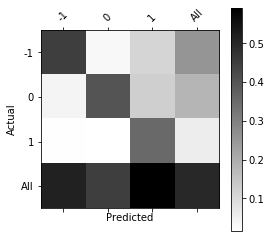

In [73]:
# plot normalized confusion matrix

plot_confusion_matrix(df_conf_norm)  

In [74]:
# f1 score
from sklearn.metrics import f1_score
f1_score(adversative_df['Sentiment Num'], adversative_df['Polarity Count'], average='weighted')

0.8448579291521247

##  Step 12: Cross Validation

In [75]:
# # shuffle the data

# df = df.sample(frac=1).reset_index(drop=True)
# print(df)

In [76]:
# df1=df[:229]
# print(df1)
# df1.to_csv('df1.csv')

In [77]:
# df2=df[229:458]
# print(df2)
# df2.to_csv('df2.csv')

In [78]:
# df3=df[458:687]
# print(df3)
# df3.to_csv('df3.csv')

In [79]:
# df4=df[687:916]
# print(df4)
# df4.to_csv('df4.csv')

In [80]:
# df5=df[916:]
# print(df5)
# df5.to_csv('df5.csv')

In [81]:
# rerun the model on each df to test if the accuracy is stable

# Step 13: Majority Voting

In [82]:
print(df.head())

                                                Text  Sentiment Num  \
0  im at comfortdelgro engineering https//t co/wa...              0   
1  you can now ebook a comfortdelgro cab on lazad...              0   
2  when are we going to go offline if our server ...             -1   
3  mmm268mmm バス乗り場行くのメンドウだからgrab comfortdelgro入れて...              0   
4  you can now book a comfortdelgro cab on lazada...              0   

                                    Polarities Found  Polarity Count  \
0                                 [0, 0, 0, 0, 0, 0]               0   
1               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]               0   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...              -1   
3                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]               0   
4               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]               0   

   Sarcasm?  Adversative Polarity  Emoji Score  Polarity Count-multi  
0         0                     0            0                   0.0 

In [84]:
df.groupby(by='Sentiment Num').count()

,Text,Polarities Found,Polarity Count,Sarcasm?,Adversative Polarity,Emoji Score,Polarity Count-multi
Sentiment Num,,,,,,,
-1,334,334,334,334,334,334,334
0,240,240,240,240,240,240,240
1,76,76,76,76,76,76,76


In [85]:
df['allnegative']=-1

In [86]:
print(df.head())

                                                Text  Sentiment Num  \
0  im at comfortdelgro engineering https//t co/wa...              0   
1  you can now ebook a comfortdelgro cab on lazad...              0   
2  when are we going to go offline if our server ...             -1   
3  mmm268mmm バス乗り場行くのメンドウだからgrab comfortdelgro入れて...              0   
4  you can now book a comfortdelgro cab on lazada...              0   

                                    Polarities Found  Polarity Count  \
0                                 [0, 0, 0, 0, 0, 0]               0   
1               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]               0   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...              -1   
3                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]               0   
4               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]               0   

   Sarcasm?  Adversative Polarity  Emoji Score  Polarity Count-multi  \
0         0                     0            0                   0.0

In [87]:
from sklearn.metrics import accuracy_score
# supposed our model predict all neutral, benchmark
print(accuracy_score(df["Sentiment Num"], df["allnegative"]))

0.5138461538461538


# Step 14: Testing without Singlish and Transport

In [88]:
# comment out the singlish and transport section and compare the accuracies differences